In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/2024/2024_01_taller_100_paginas_ml':
  os.chdir(r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/2024/2024_01_taller_100_paginas_ml')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/

/var/folders/4d/qj4qr8zx1n36td0hlt0p7x_h0000gn/T/ipykernel_16408/468825776.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



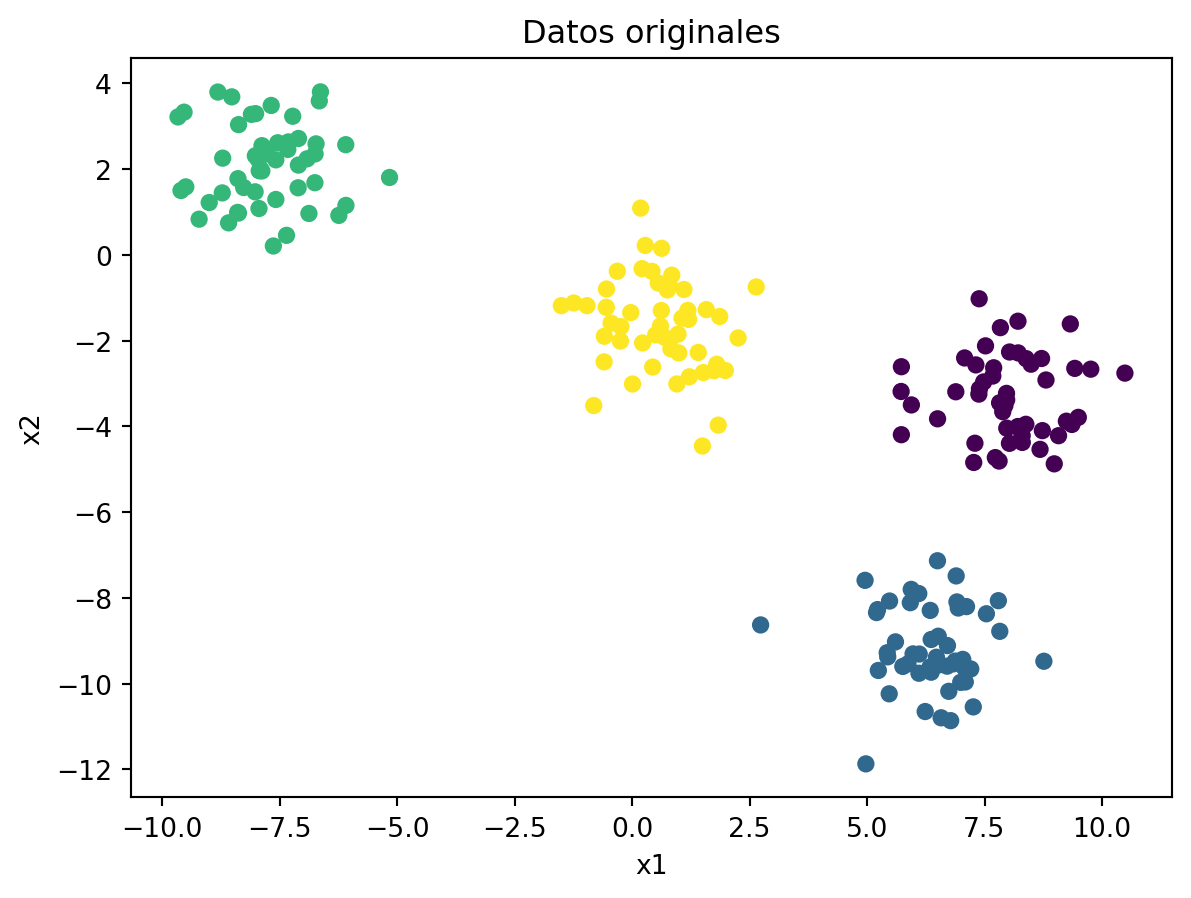

In [2]:
#| label: ejemplo01Datos
#| fig-cap: 'Ejemplo hecho en python: datos'

from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

# Creación de los datos
X, Y = make_blobs(n_samples=200, centers=4, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30)
plt.title("Datos originales")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

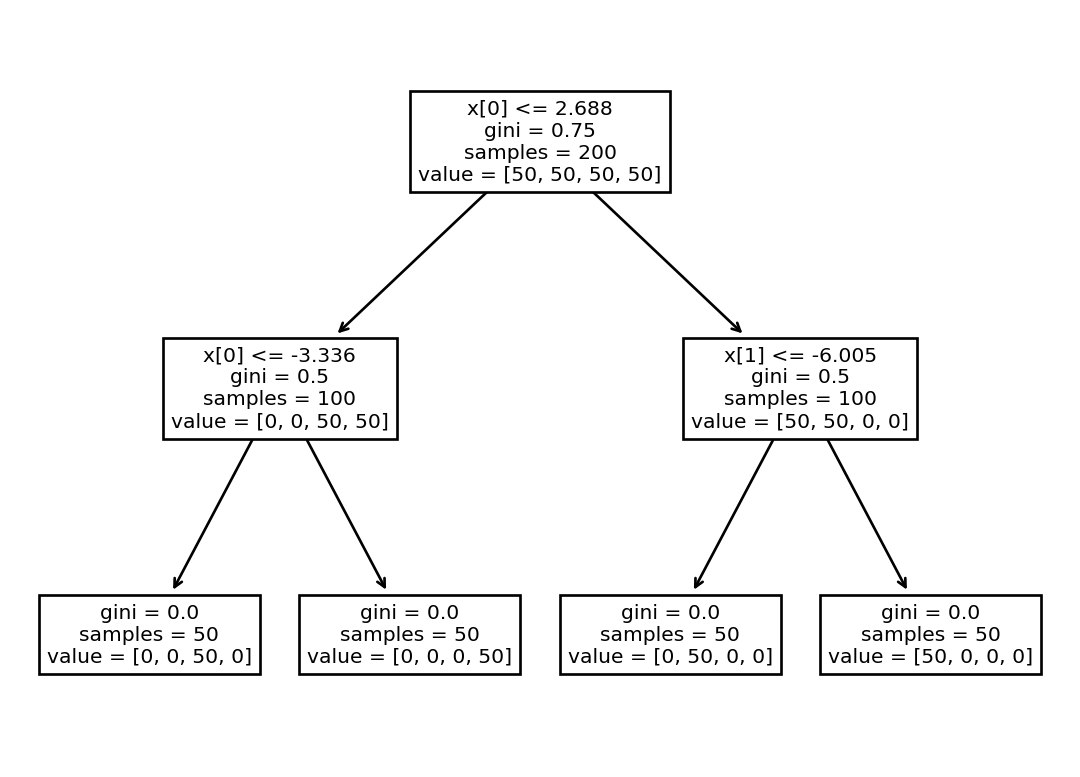

In [3]:
#| label: ejemplo01Arbol
#| fig-cap: 'Ejemplo hecho en python: arbol'
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
tree.plot_tree(clf)
plt.show()

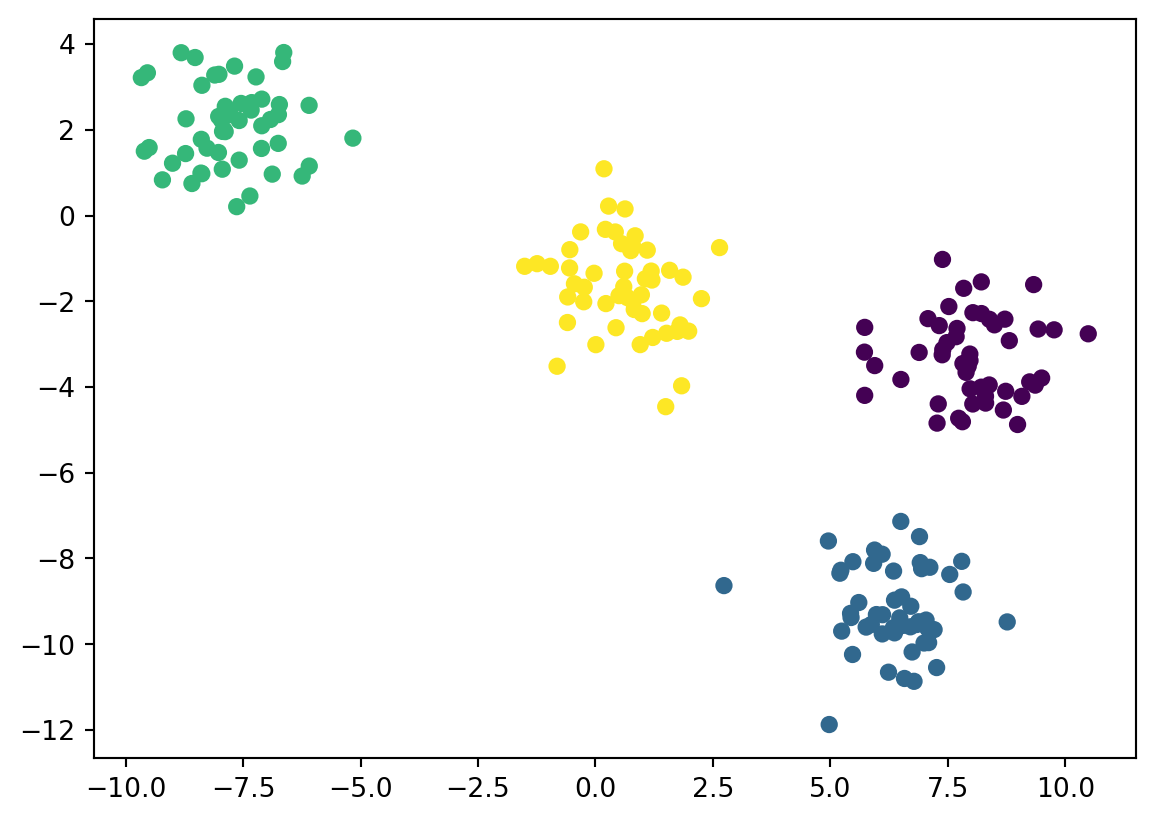

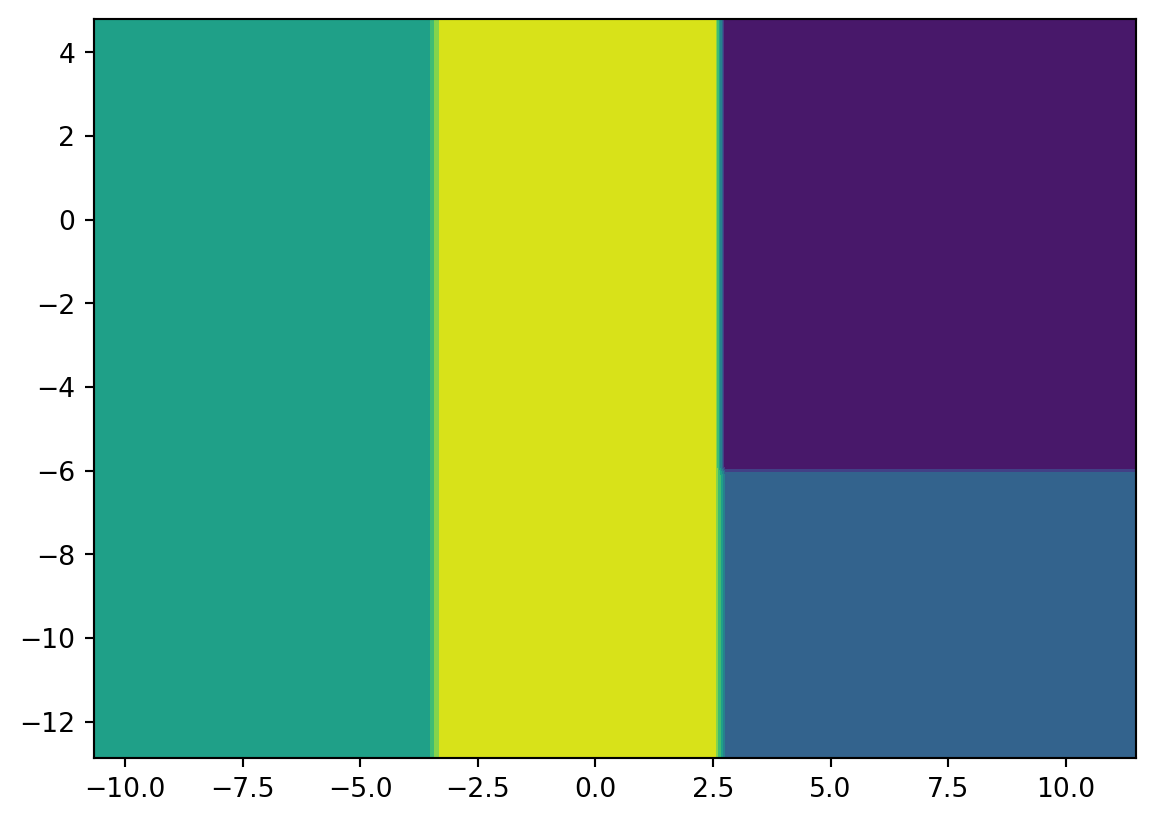

In [4]:
#| label: ejemplo01Separacion
#| fig-cap: 'Ejemplo hecho en python: separación'
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30)
DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict")
plt.show()

In [5]:
#| label: ejemplo01Aplicacion
print(clf.predict([[5.0, 1.0]]))
print(clf.predict([[-2.0, -1.0]]))
print(clf.predict([[6.0, -6.0]]))

[0]
[3]
[0]
